In [ ]:
import pandas as pd
stock_url= "https://github.com/tobypenk/data-bootcamp/blob/main/week%2011/stocks.csv?raw=true"

In [ ]:
stocks = pd.read_csv(stock_url)
stocks

,begins_at,open_price,close_price,high_price,low_price,volume,session,interpolated,symbol
0,2023-04-14T13:30:00Z,412.810,413.1700,413.250,412.7700,408345,reg,False,SPY
1,2023-04-14T13:35:00Z,413.180,413.9800,414.160,413.1700,538976,reg,False,SPY
2,2023-04-14T13:40:00Z,413.990,414.3014,414.405,413.6803,424994,reg,False,SPY
3,2023-04-14T13:45:00Z,414.315,414.6700,414.780,414.2300,482298,reg,False,SPY
4,2023-04-14T13:50:00Z,414.680,414.6700,415.010,414.6000,537492,reg,False,SPY
...,...,...,...,...,...,...,...,...,...
15127,2023-04-14T19:35:00Z,67.005,67.1500,67.150,66.9900,9451,reg,False,DDOG
15128,2023-04-14T19:40:00Z,67.180,67.4450,67.480,67.1200,33021,reg,False,DDOG
15129,2023-04-14T19:45:00Z,67.450,67.3600,67.470,67.3200,37966,reg,False,DDOG
15130,2023-04-14T19:50:00Z,67.350,67.3400,67.405,67.2600,36018,reg,False,DDOG


In [ ]:
stocks.drop(
    ["open_price","high_price","low_price","volume","session","interpolated"],
    axis=1,
    inplace=True
  )
stocks

,begins_at,close_price,symbol
0,2023-04-14T13:30:00Z,413.1700,SPY
1,2023-04-14T13:35:00Z,413.9800,SPY
2,2023-04-14T13:40:00Z,414.3014,SPY
3,2023-04-14T13:45:00Z,414.6700,SPY
4,2023-04-14T13:50:00Z,414.6700,SPY
...,...,...,...
15127,2023-04-14T19:35:00Z,67.1500,DDOG
15128,2023-04-14T19:40:00Z,67.4450,DDOG
15129,2023-04-14T19:45:00Z,67.3600,DDOG
15130,2023-04-14T19:50:00Z,67.3400,DDOG


In [ ]:
stocks["begins_at"] = stocks["begins_at"].apply(lambda x: pd.to_datetime(x) + pd.Timedelta("5M"))

<ipython-input-4-ba3ca2455a36>:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  stocks["begins_at"] = stocks["begins_at"].apply(lambda x: pd.to_datetime(x) + pd.Timedelta("5M"))


In [ ]:
stocks.index = stocks["begins_at"]
stocks.drop("begins_at",axis=1,inplace=True)


In [ ]:
stocks

,close_price,symbol
begins_at,,
2023-04-14 13:35:00+00:00,413.1700,SPY
2023-04-14 13:40:00+00:00,413.9800,SPY
2023-04-14 13:45:00+00:00,414.3014,SPY
2023-04-14 13:50:00+00:00,414.6700,SPY
2023-04-14 13:55:00+00:00,414.6700,SPY
...,...,...
2023-04-14 19:40:00+00:00,67.1500,DDOG
2023-04-14 19:45:00+00:00,67.4450,DDOG
2023-04-14 19:50:00+00:00,67.3600,DDOG


In [ ]:
stocks = stocks.pivot(columns="symbol",values="close_price")

In [ ]:
returns = stocks.pct_change().shift(-1).dropna()

In [ ]:
import plotly.express as px
idx = 60
fig = px.histogram(returns.iloc[:,idx],nbins=50,title="returns for "+returns.columns[idx])
fig.show()

In [ ]:
idx = 61
fig = px.line(returns.iloc[:,idx],title="returns for "+returns.columns[idx])
fig.show()

In [ ]:
returns.loc[:,"timestamp"] = returns.index

In [ ]:
stocks_raw = pd.read_csv(stock_url)
stocks_raw["returns"] = stocks_raw["close_price"].pct_change().shift(-1)
stocks_raw["begins_at"] = pd.to_datetime(stocks_raw["begins_at"])

In [ ]:
symbol_mask = stocks_raw["symbol"].isin(["AAPL","NFLX","TSLA","SPY"])
returns_mask = abs(stocks_raw["returns"]) < 0.01

fig = px.scatter(
    stocks_raw[symbol_mask][returns_mask],
    x="begins_at",
    y="returns",
    size="volume",
    color="symbol"
)
fig.show()


<ipython-input-13-ed586590b014>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
returns

symbol,AA,AAL,AAPL,ABBV,ABNB,ABR,ACI,AFRM,AI,ALLY,...,XLK,XLU,XOM,XOP,XP,XPEV,XRT,ZIM,ZM,timestamp
begins_at,,,,,,,,,,,,,,,,,,,,,
2023-04-14 13:35:00+00:00,0.001942,0.004213,0.003152,0.002526,0.006589,-0.001947,-0.000616,0.013443,0.008152,-0.003681,...,0.002689,0.000145,-0.003955,-0.000962,0.006137,0.016743,0.001906,0.004976,0.006968,2023-04-14 13:35:00+00:00
2023-04-14 13:40:00+00:00,0.000242,-0.002656,0.002719,0.000645,-0.003317,-0.009990,0.000485,-0.004486,0.001797,-0.005172,...,0.002145,0.003115,0.001581,0.000222,0.014352,-0.004990,0.002219,-0.001651,-0.002853,2023-04-14 13:40:00+00:00
2023-04-14 13:45:00+00:00,0.001575,0.003860,0.000090,-0.002364,0.002890,0.011052,0.000000,0.009806,0.013229,0.005577,...,0.000334,-0.000217,-0.000544,0.001184,-0.001769,0.006520,0.004429,0.015588,-0.002003,2023-04-14 13:45:00+00:00
2023-04-14 13:50:00+00:00,-0.002298,0.000000,0.000581,0.000092,-0.000742,0.000951,0.001212,-0.005344,0.009515,-0.001854,...,0.001003,-0.001300,0.000949,-0.001035,0.001063,0.002990,-0.002992,0.012093,0.000573,2023-04-14 13:50:00+00:00
2023-04-14 13:55:00+00:00,0.002424,0.001153,-0.001665,-0.000585,0.002228,-0.004758,0.000281,0.001756,-0.005699,0.005179,...,-0.000267,-0.001446,0.000086,0.001554,0.003540,0.007948,-0.000948,-0.002757,0.000860,2023-04-14 13:55:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14 19:35:00+00:00,0.001958,0.000000,0.001031,0.001208,0.000786,0.000968,0.000000,0.001821,-0.000230,0.003747,...,0.000944,0.000799,0.000777,0.002240,0.003240,-0.001004,0.001610,0.003197,0.000868,2023-04-14 19:35:00+00:00
2023-04-14 19:40:00+00:00,-0.000099,0.000782,0.000787,0.000743,0.000945,0.000000,0.000000,0.001817,-0.002068,0.000933,...,0.000875,0.001452,-0.000043,-0.000522,-0.000718,0.001507,0.000321,0.000297,0.000143,2023-04-14 19:40:00+00:00
2023-04-14 19:45:00+00:00,0.000000,-0.000781,-0.000726,0.000311,-0.001031,0.000000,0.000484,0.000454,0.001381,0.000932,...,0.000067,0.000218,0.000086,0.000000,-0.000359,-0.000502,0.000161,0.001625,-0.000071,2023-04-14 19:45:00+00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, Model


In [ ]:
LOOKBACK = 10
TRAIN_RATIO = 0.8
EPOCHS = 50
BATCH_SIZE = 32

In [ ]:
def stock_train_test_split(returns, ticker, lookback=LOOKBACK):

  sr = returns[ticker]

  X = np.array([sr[i:i+lookback] for i in range(len(returns) - lookback - 1)])
  y = np.array([sr[i+lookback] for i in range(len(returns) - lookback - 1)]).reshape(-1, 1)
  
  split_index = int(X.shape[0] * TRAIN_RATIO)
  X_train, X_test = X[:split_index], X[split_index:]
  y_train, y_test = y[:split_index], y[split_index:]

  scaler_X = StandardScaler()
  scaler_y = StandardScaler()

  X_train_scaled = scaler_X.fit_transform(X_train)
  X_test_scaled = scaler_X.transform(X_test)
  y_train_scaled = scaler_y.fit_transform(y_train)
  y_test_scaled = scaler_y.transform(y_test)

  return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_X, scaler_y

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_X, scaler_y = stock_train_test_split(returns,"AAPL")
y_train_scaled = y_train_scaled.flatten()
y_test_scaled = y_test_scaled.flatten()

In [ ]:
def one_stock_model():
  input_layer = layers.Input(shape=(LOOKBACK,))
  dense1 = layers.Dense(64,activation="relu")(input_layer)
  dropout1 = layers.Dropout(0.2)(dense1)
  dense2 = layers.Dense(32, activation="relu")(dropout1)
  dropout2 = layers.Dropout(0.2)(dense2)
  output = layers.Dense(1, activation="linear")(dropout2)

  model = Model(inputs=input_layer, outputs = output)
  model.compile(optimizer="adam", loss="mse", metrics=["mae"])

  return model


In [ ]:
model = one_stock_model()
model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=EPOCHS,
    validation_split=TRAIN_RATIO,
    batch_size=BATCH_SIZE
)


Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 1.4877 - mae: 1.0377 - val_loss: 1.0908 - val_mae: 0.8675
Epoch 2/50
1/1 [==============================] - 0s 136ms/step - loss: 1.0973 - mae: 0.8386 - val_loss: 1.0931 - val_mae: 0.8672
Epoch 3/50
1/1 [==============================] - 0s 123ms/step - loss: 0.5260 - mae: 0.5829 - val_loss: 1.0943 - val_mae: 0.8666
Epoch 4/50
1/1 [==============================] - 0s 83ms/step - loss: 0.7218 - mae: 0.7034 - val_loss: 1.0976 - val_mae: 0.8666
Epoch 5/50
1/1 [==============================] - 0s 91ms/step - loss: 0.5548 - mae: 0.5860 - val_loss: 1.0989 - val_mae: 0.8655
Epoch 6/50
1/1 [==============================] - 0s 208ms/step - loss: 0.8745 - mae: 0.7922 - val_loss: 1.0993 - val_mae: 0.8643
Epoch 7/50
1/1 [==============================] - 0s 90ms/step - loss: 0.8721 - mae: 0.8401 - val_loss: 1.0978 - val_mae: 0.8631
Epoch 8/50
1/1 [==============================] - 0s 90ms/step - loss: 0.7137 - mae: 0.6715 - va

In [ ]:
y_pred = model.predict(X_test_scaled)

1/1 [==============================] - 0s 458ms/step


In [ ]:
y_pred_unscaled = scaler_y.inverse_transform(y_pred)
y_test_unscaled = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1))

In [ ]:
def plot_values(y_test_unscaled,y_pred_unscaled):
  import matplotlib.pyplot as plt

  plt.figure(figsize=(6,3))
  plt.plot(y_test_unscaled, label="actuals")
  plt.plot(y_pred_unscaled, label="predicted")
  plt.legend()
  plt.show()

In [ ]:
def test_strategy(y_test_unscaled,y_pred_unscaled,dollars=100):

  for i in range(len(y_pred_unscaled)):
    real_return = 1+y_test_unscaled[i]

    if y_pred_unscaled[i] > 0:
      # buy or hold
      dollars *= real_return
    else:
      # sell or put
      dollars /= real_return

  return dollars

test_strategy(y_test_unscaled,y_pred_unscaled)

array([99.89603299])

In [ ]:
# 100.20341411

In [ ]:
pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 58.9 MB/s eta 0:00:00


In [ ]:
import urllib.request, json

tweets_url = "https://github.com/tobypenk/data-bootcamp/raw/main/week%2011/all_tweets.json"

with urllib.request.urlopen(tweets_url) as url_open:
  tweets = json.load(url_open)



In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

embedder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")


In [ ]:
text_data = pd.DataFrame(tweets)["tweets"]
text_data = text_data[LOOKBACK:-1]

In [ ]:
split_index = int(len(text_data) * TRAIN_RATIO)
text_train = text_data[:split_index]
text_test = text_data[split_index:]

In [ ]:
train_embedded = embedder(text_train).numpy()
test_embedded = embedder(text_test).numpy()

In [ ]:
X_train_combined = np.hstack([X_train_scaled,train_embedded])
X_test_combined = np.hstack([X_test_scaled,test_embedded])

In [ ]:
def one_stock_and_text_model(input_shape):
  input_layer = layers.Input(shape=input_shape)
  dense1 = layers.Dense(256,activation="relu")(input_layer)
  dropout1 = layers.Dropout(0.2)(dense1)
  dense2 = layers.Dense(128, activation="relu")(dropout1)
  dropout2 = layers.Dropout(0.2)(dense2)
  output = layers.Dense(1, activation="linear")(dropout2)

  model = Model(inputs=input_layer, outputs = output)
  model.compile(optimizer="adam", loss="mse", metrics=["mae"])

  return model

model_combined = one_stock_and_text_model(X_train_combined.shape[1])

In [ ]:
model_combined.fit(
    X_train_combined,
    y_train_scaled,
    epochs=EPOCHS,
    validation_split=TRAIN_RATIO,
    batch_size=BATCH_SIZE
)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.9903 - mae: 0.8000 - val_loss: 1.0296 - val_mae: 0.8402
Epoch 2/50
1/1 [==============================] - 0s 93ms/step - loss: 0.7932 - mae: 0.7552 - val_loss: 1.0158 - val_mae: 0.8332
Epoch 3/50
1/1 [==============================] - 0s 81ms/step - loss: 0.6678 - mae: 0.6561 - val_loss: 1.0106 - val_mae: 0.8287
Epoch 4/50
1/1 [==============================] - 0s 93ms/step - loss: 0.5736 - mae: 0.5377 - val_loss: 1.0087 - val_mae: 0.8256
Epoch 5/50
1/1 [==============================] - 0s 87ms/step - loss: 0.4456 - mae: 0.4933 - val_loss: 1.0096 - val_mae: 0.8232
Epoch 6/50
1/1 [==============================] - 0s 119ms/step - loss: 0.1515 - mae: 0.3228 - val_loss: 1.0152 - val_mae: 0.8223
Epoch 7/50
1/1 [==============================] - 0s 60ms/step - loss: 0.1587 - mae: 0.3310 - val_loss: 1.0221 - val_mae: 0.8225
Epoch 8/50
1/1 [==============================] - 0s 89ms/step - loss: 0.0744 - mae: 0.2064 - val_

In [ ]:
y_pred_combined = model_combined.predict(X_test_combined)

1/1 [==============================] - 0s 220ms/step


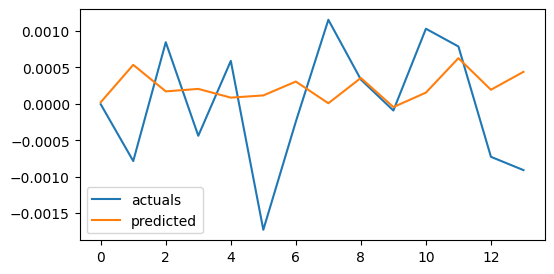

In [ ]:
y_pred_combined_unscaled = scaler_y.inverse_transform(y_pred_combined)
plot_values(y_test_unscaled,y_pred_combined_unscaled)

In [ ]:
test_strategy(y_test_unscaled,y_pred_combined_unscaled)

array([99.99945862])

In [ ]:
returns

symbol,AA,AAL,AAPL,ABBV,ABNB,ABR,ACI,AFRM,AI,ALLY,...,XLK,XLU,XOM,XOP,XP,XPEV,XRT,ZIM,ZM,timestamp
begins_at,,,,,,,,,,,,,,,,,,,,,
2023-04-14 13:35:00+00:00,0.001942,0.004213,0.003152,0.002526,0.006589,-0.001947,-0.000616,0.013443,0.008152,-0.003681,...,0.002689,0.000145,-0.003955,-0.000962,0.006137,0.016743,0.001906,0.004976,0.006968,2023-04-14 13:35:00+00:00
2023-04-14 13:40:00+00:00,0.000242,-0.002656,0.002719,0.000645,-0.003317,-0.009990,0.000485,-0.004486,0.001797,-0.005172,...,0.002145,0.003115,0.001581,0.000222,0.014352,-0.004990,0.002219,-0.001651,-0.002853,2023-04-14 13:40:00+00:00
2023-04-14 13:45:00+00:00,0.001575,0.003860,0.000090,-0.002364,0.002890,0.011052,0.000000,0.009806,0.013229,0.005577,...,0.000334,-0.000217,-0.000544,0.001184,-0.001769,0.006520,0.004429,0.015588,-0.002003,2023-04-14 13:45:00+00:00
2023-04-14 13:50:00+00:00,-0.002298,0.000000,0.000581,0.000092,-0.000742,0.000951,0.001212,-0.005344,0.009515,-0.001854,...,0.001003,-0.001300,0.000949,-0.001035,0.001063,0.002990,-0.002992,0.012093,0.000573,2023-04-14 13:50:00+00:00
2023-04-14 13:55:00+00:00,0.002424,0.001153,-0.001665,-0.000585,0.002228,-0.004758,0.000281,0.001756,-0.005699,0.005179,...,-0.000267,-0.001446,0.000086,0.001554,0.003540,0.007948,-0.000948,-0.002757,0.000860,2023-04-14 13:55:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14 19:35:00+00:00,0.001958,0.000000,0.001031,0.001208,0.000786,0.000968,0.000000,0.001821,-0.000230,0.003747,...,0.000944,0.000799,0.000777,0.002240,0.003240,-0.001004,0.001610,0.003197,0.000868,2023-04-14 19:35:00+00:00
2023-04-14 19:40:00+00:00,-0.000099,0.000782,0.000787,0.000743,0.000945,0.000000,0.000000,0.001817,-0.002068,0.000933,...,0.000875,0.001452,-0.000043,-0.000522,-0.000718,0.001507,0.000321,0.000297,0.000143,2023-04-14 19:40:00+00:00
2023-04-14 19:45:00+00:00,0.000000,-0.000781,-0.000726,0.000311,-0.001031,0.000000,0.000484,0.000454,0.001381,0.000932,...,0.000067,0.000218,0.000086,0.000000,-0.000359,-0.000502,0.000161,0.001625,-0.000071,2023-04-14 19:45:00+00:00


In [ ]:
def all_stock_train_test_split(returns, ticker, lookback=LOOKBACK):

  sr = returns.drop("timestamp",axis=1)
  y = returns[ticker]
  
  X = np.array([sr[i:i+lookback] for i in range(len(returns) - lookback - 1)])
  y = np.array([y[i+lookback] for i in range(len(returns) - lookback - 1)]).reshape(-1, 1)

  split_index = int(X.shape[0] * TRAIN_RATIO)
  X_train, X_test = X[:split_index], X[split_index:]
  y_train, y_test = y[:split_index], y[split_index:]

  scaler_X = StandardScaler()
  scaler_y = StandardScaler()

  X_train_scaled = scaler_X.fit_transform(X_train.reshape(X_train.shape[0], -1)).reshape(X_train.shape)
  X_test_scaled = scaler_X.transform(X_test.reshape(X_test.shape[0], -1)).reshape(X_test.shape)
  y_train_scaled = scaler_y.fit_transform(y_train)
  y_test_scaled = scaler_y.transform(y_test)

  return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_X, scaler_y

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_X, scaler_y = all_stock_train_test_split(returns,"AAPL")
#y_train_scaled = y_train_scaled.flatten()
#y_test_scaled = y_test_scaled.flatten()

In [ ]:
def all_stock_model(input_shape):
  input_layer = layers.Input(shape=(input_shape[1],input_shape[2]))
  dense1 = layers.Dense(256,activation="relu")(input_layer)
  dropout1 = layers.Dropout(0.2)(dense1)
  dense2 = layers.Dense(128, activation="relu")(dropout1)
  dropout2 = layers.Dropout(0.2)(dense2)
  output = layers.Dense(1, activation="linear")(dropout2)

  model = Model(inputs=input_layer, outputs = output)
  model.compile(optimizer="adam", loss="mse", metrics=["mae"])

  return model

model_all = all_stock_model(X_train_scaled.shape)

In [ ]:
y_pred = model_all.predict(X_test_scaled)

y_pred = list(map(lambda x: x[0][0], y_pred))

1/1 [==============================] - 0s 24ms/step


In [ ]:
y_pred_unscaled = scaler_y.inverse_transform(np.array(y_pred).reshape(-1,1))
y_test_unscaled = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1))

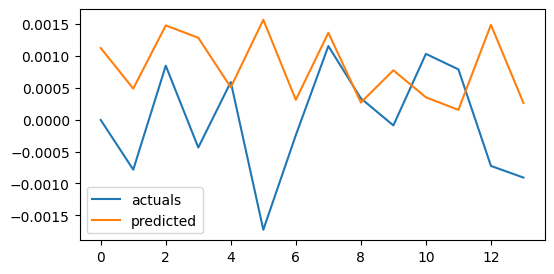

In [ ]:
plot_values(y_test_unscaled,y_pred_unscaled)

In [ ]:
test_strategy(y_test_unscaled,y_pred_unscaled)

array([99.98127056])